In [2]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

### Experiment 2 - Coupled 3-box

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [36]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 5

# Initialize forcing vectors and run experiments
experiments = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, exp in enumerate(experiments):
  forcings[exp] = emulator_utils.generate_forcing(exp, t, t_end, t_star, n_boxes)
  full_outputs[exp] = BudykoSellers.Run_Budyko_Sellers(exp_flag=i, diff_flag=1)
  T_out[exp] = np.squeeze(full_outputs[exp]['T_ts'])[0:n_boxes,:]

100%|██████████| 365239/365239 [00:13<00:00, 27830.29it/s]
/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:299: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  #grid['dz_slabs'] = np.array([])
100%|██████████| 365239/365239 [00:14<00:00, 25830.93it/s]


### Method X: DMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.00289703308592705
	Test: High Emissions - 1.5496161789818064
	Test: Overshoot - 0.34002346427512803
Train: High Emissions - L2 Error
	Test: 2xCO2 - 3.0976720133788715
	Test: High Emissions - 4.484312134058936e-05
	Test: Overshoot - 1.4041646369962613
Train: Overshoot - L2 Error
	Test: 2xCO2 - 5.56847755448353e+87
	Test: High Emissions - 8.396442680281936e+85
	Test: Overshoot - 8.883229996012205e+82


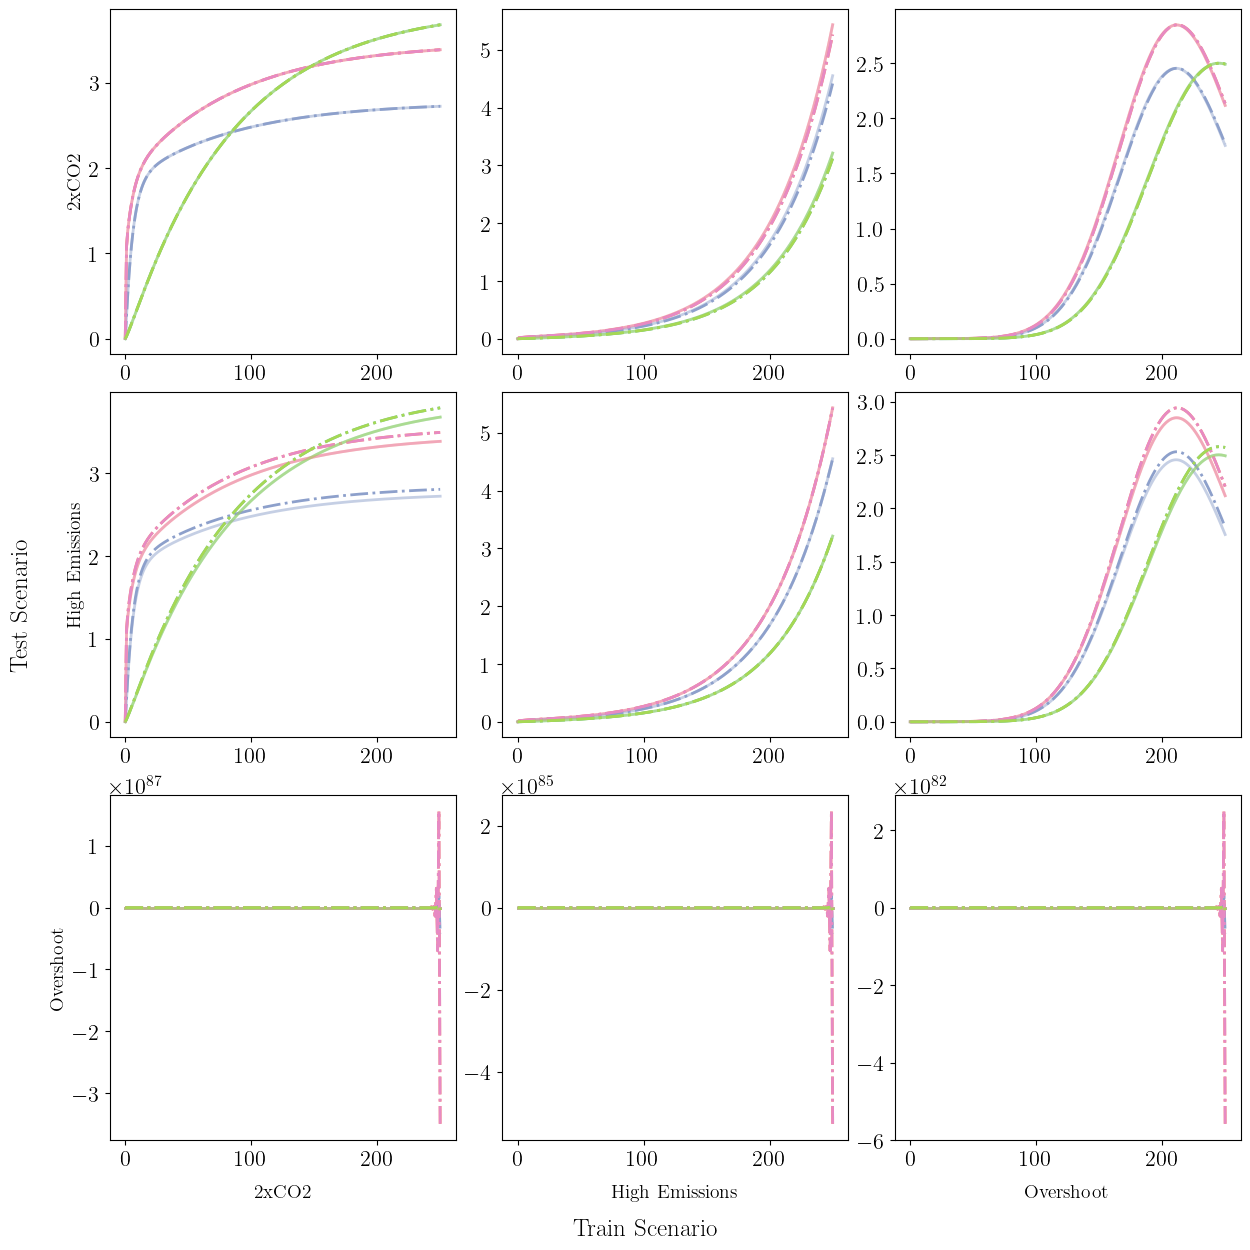

In [37]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'DMD', w0, t, dt, n_steps, n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, experiments)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.0028970330858259625
	Test: High Emissions - 22.54579721862466
	Test: Overshoot - 8.55845586981279
Train: High Emissions - L2 Error
	Test: 2xCO2 - 3.097819237344198
	Test: High Emissions - 4.484291616250671e-05
	Test: Overshoot - 1.4041796440816587
Train: Overshoot - L2 Error
	Test: 2xCO2 - 7.646874016165156e+89
	Test: High Emissions - 1.1530779864479008e+88
	Test: Overshoot - 1.2188897652037445e+85


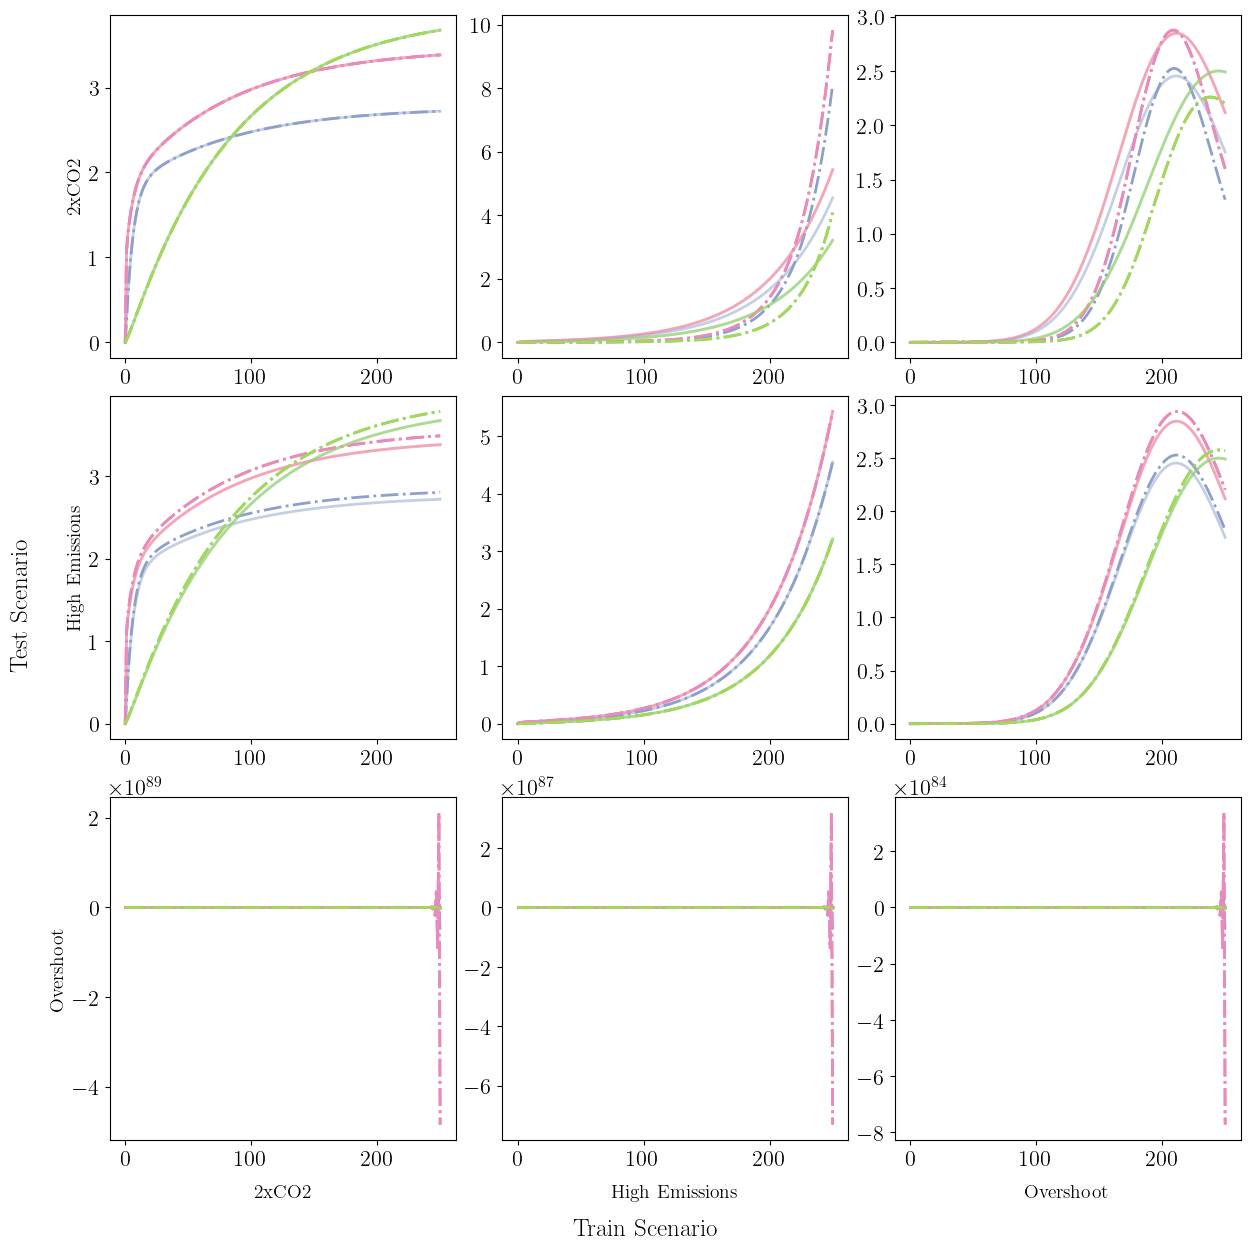

In [50]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='polynomial', degree=1)
F_dict = emulator_utils.Vector_Dict(method='polynomial', degree=2)
operator_EDMD, T_pred_EDMD = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'EDMD', w0, t, dt, n_steps, n_boxes, w_dict, F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, experiments)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 1.7879290532731086e-14
	Test: High Emissions - 1.5485913190258287
	Test: Overshoot - 0.3394028975271694
Train: High Emissions - L2 Error
	Test: 2xCO2 - 3.096017353318667
	Test: High Emissions - 3.251229016809232e-14
	Test: Overshoot - 1.4032857236578373
Train: Overshoot - L2 Error
	Test: 2xCO2 - 750258.3825816041
	Test: High Emissions - 12040.555514472147
	Test: Overshoot - 4.576272362042656e-14


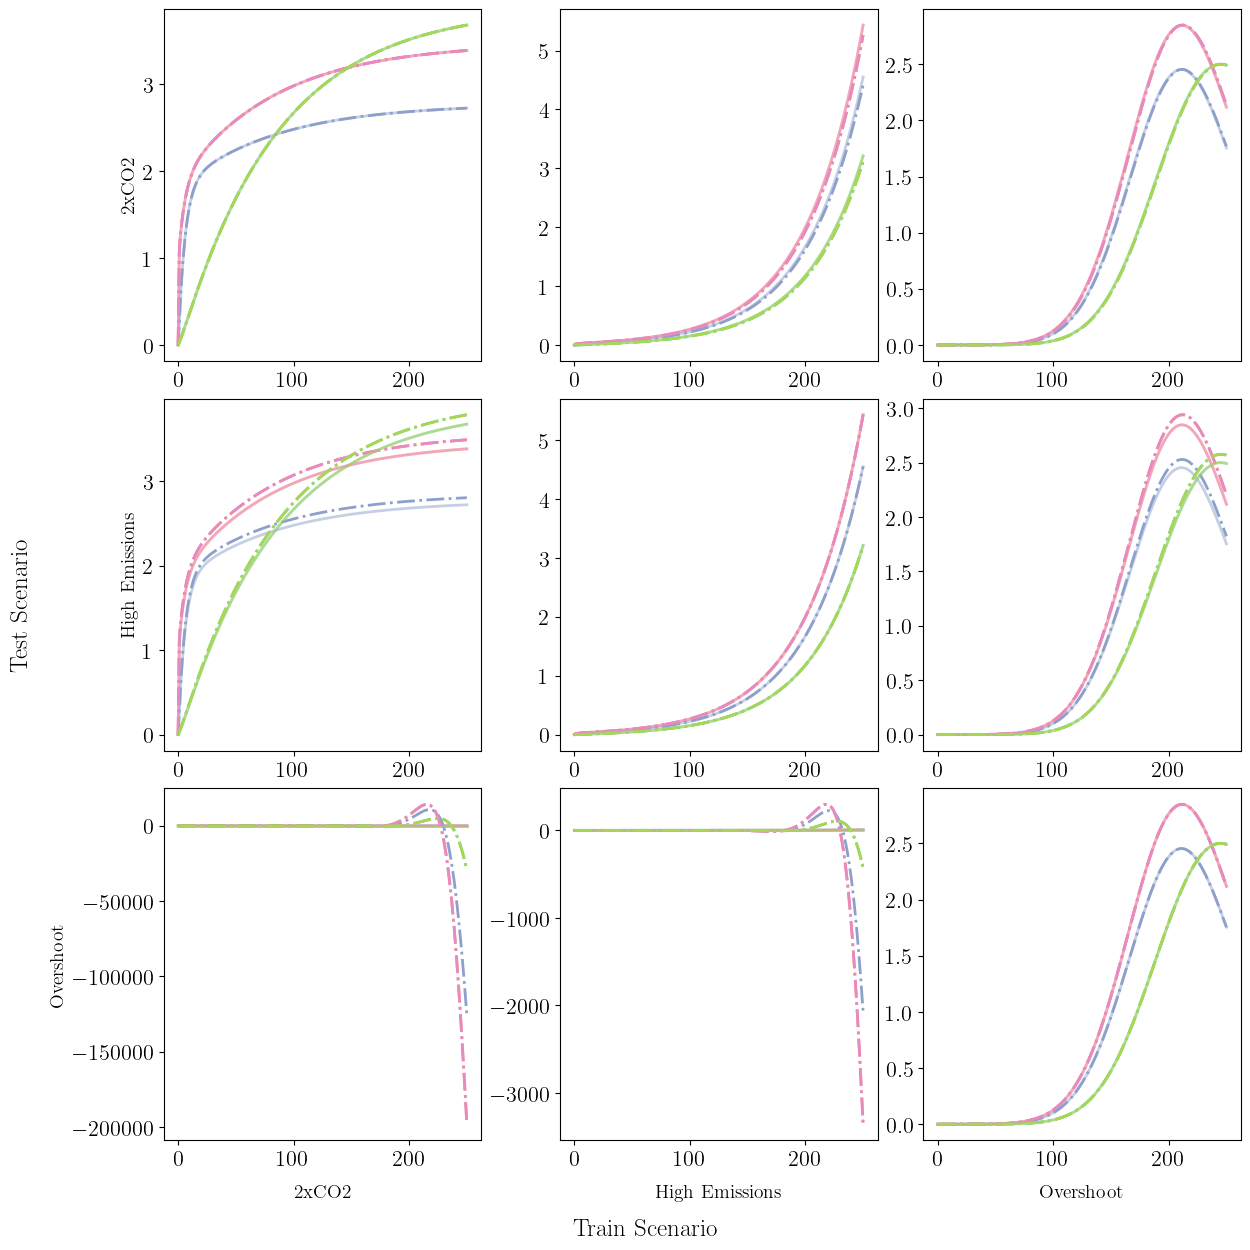

In [44]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'deconvolve', w0, t, dt, n_steps, n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, experiments)

### Method X: Direct Diagnosis (FDT)

100%|██████████| 365239/365239 [00:13<00:00, 26474.09it/s]


Train: Impulse Forcing - L2 Error
	Test: 2xCO2 - 0.04472724305416585
	Test: High Emissions - 1.523271184588305
	Test: Overshoot - 0.332571087155408


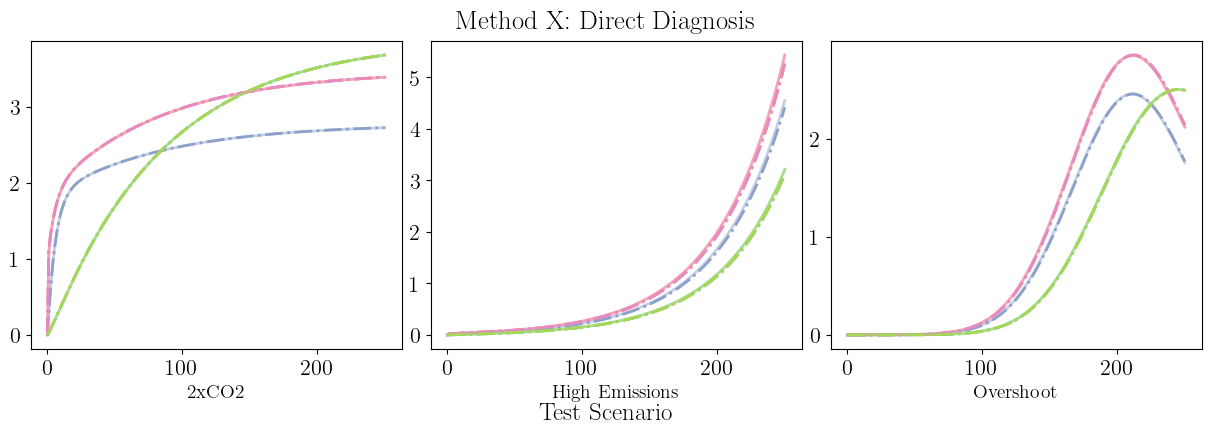

In [45]:
operator_direct, T_pred_direct = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'direct', w0, t, dt, n_steps, n_boxes, diff_flag=1)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, experiments)

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 0.74844393  0.46417322  1.21682027  0.48071784 -0.4710566   0.527896
  1.37506111  0.46755474  0.48492807  0.48514877 -0.39736641 -0.90473772]
	Test: 2xCO2 - 24.68775717431141
	Test: High Emissions - 19.70732087485598
	Test: Overshoot - 15.73450134262834
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.38879176  0.25495334  0.45850735  0.68208728  0.48998934  0.43980346
  0.55221339  0.5649594   0.53186722  0.07773659 -1.37084129 -0.14835553]
	Test: 2xCO2 - 35.96158143530965
	Test: High Emissions - 0.2165182835769776
	Test: Overshoot - 11.478245772080616
Train: Overshoot - L2 Error
Exponential Fit Results:
 [ 0.69824492  0.47692525  1.22048622  0.81827558  0.97933021  0.63836689
  1.21193665  0.79771855  0.6590185   0.4278977  -2.34776176 -0.20969054]
	Test: 2xCO2 - 33.15395801037349
	Test: High Emissions - 3.749515556004959
	Test: Overshoot - 10.753463884271824


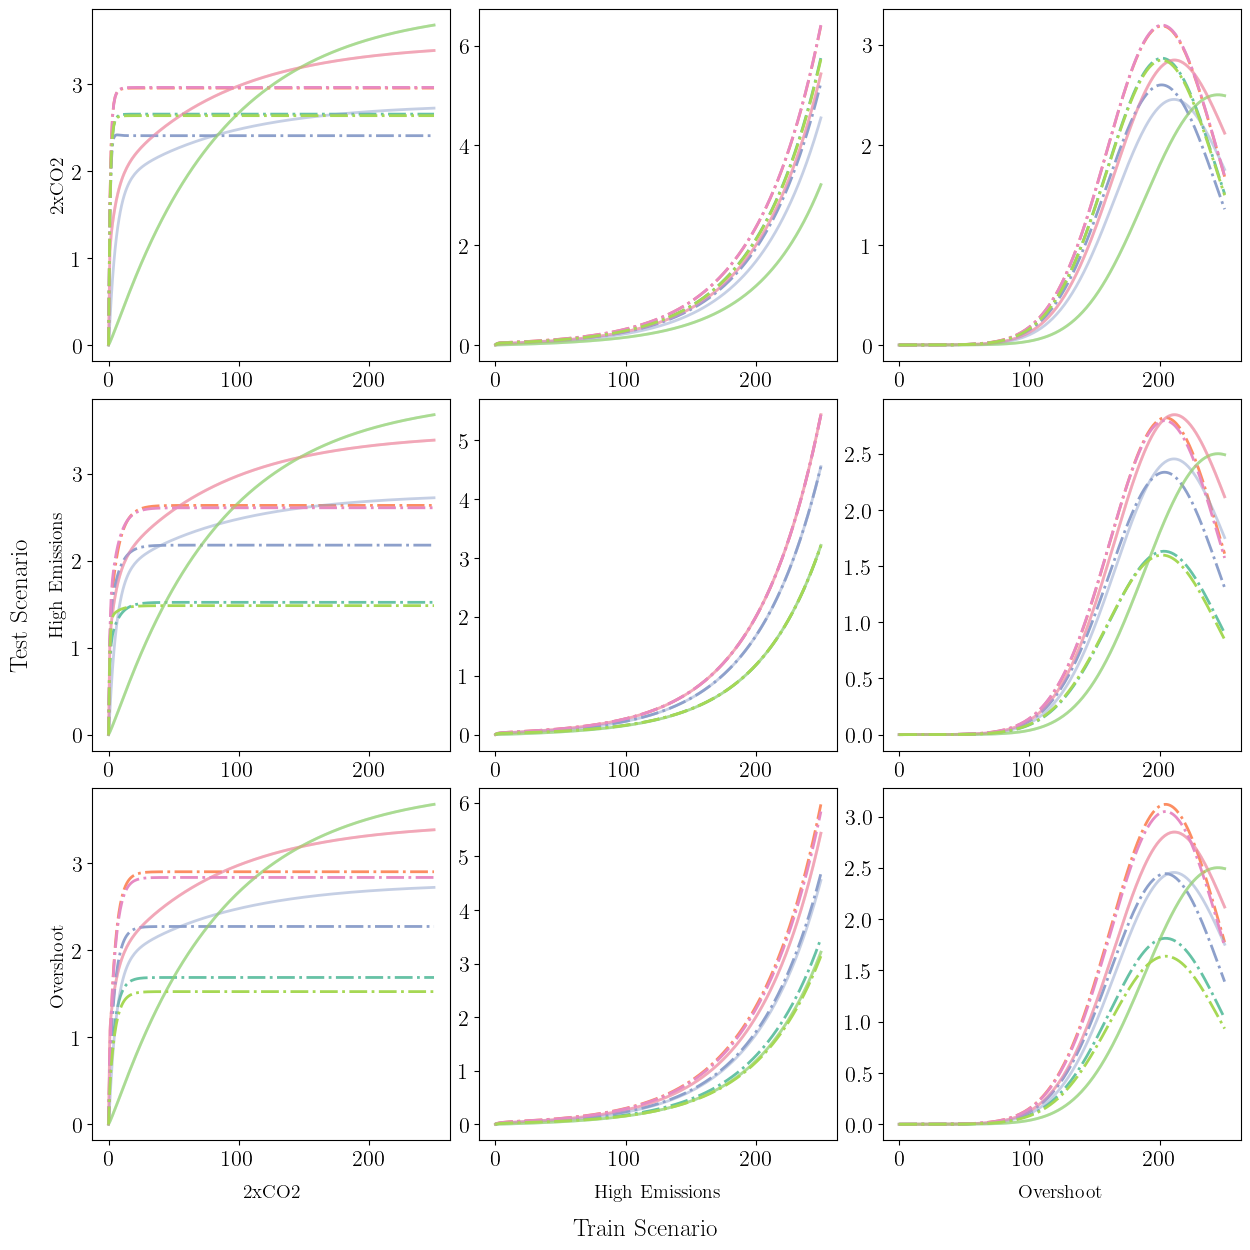

In [47]:
operator_fit, T_pred_fit = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'fit', w0, t, dt, n_steps, n_boxes, n_modes=2, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit, experiments)